<h1 style="color:#D30982;text-align:center;vertical-align:middle;">Introduction to Quantum Approximate Optimization Algorithm (QAOA)
    <br></h1>

<h1 style="color:#D30982;">Overview</h1>

- Quantum Evolution in Time
- Adiabatic Quantum Computing and Trotterization
- QAOA

<!-- - Review basics of quantum evolution
- Adiabatic Theorem in Adiabatic Quantum Computing and Quantum Annealing
- Quantum Approximate Optimization Algorithm -->

<h1 style="color:#D30982;">Quantum Evolution in Time</h1>


In quantum computing, we focus on applying quantum gates to quantum states to perform useful computations. By this point you likely understand that applying an $X$ gate to a $\ket{0}$ state results in a $\ket{1}$ state and that we write this mathematically as $X\ket{0}=\ket{1}$. There is also a sense in which this change in state takes place over some finite time. We apply $X$ to the $\ket{0}$ state at time $t_0$ and the application of the gate $X$ requires some time to take place.

This notion of time-evolution for a quantum system is described by the famous Schoedinger Equation:

$$ H \ket{\psi (t)} = i \hbar \frac{\partial}{\partial t} \ket{\psi(t)}\;, $$

where $H$ is an object called the Hamiltonian, $i=\sqrt{-1}$, $\hbar$ is Planck's reduced constant, and $\ket{\psi}$ is any quantum state. Notice that the quantum state is a function of time! 

It turns out that we can solve the Schroedinger equation in this general form and yield the following:

$$ \ket{\psi (t)} = e^{-i H t/\hbar} \ket{\psi(0)}$$

In words, this says that $e^{-t Ht/\hbar}$ acts upon the quantum state $\ket{\psi(0)}$ to yield the quantum state at a different time. AKA $e^{-t Ht/\hbar}$ evolves the quantum system in time. This expression,  $e^{-t Ht/\hbar}$, is a unitary matrix and in fact *any* unitary matrix can act in this way to evolve a quantum system. Representing some arbitrary unitary matrix as $U(t)$, this means that

$$ U(t) \ket{\psi(0)} = \ket{\psi(t)}$$

**Brief aside: Review mathematics and relevance of hermitian/unitary matrices... **

All of the quantum gates you have learned about have indeed been unitary matrices, and thus describe quantum evolution. Previously the fact that these evolve states forward in time has been implicit because all we cared about was exactly how the state changed and not how long it took. To fully understand QAOA and its context in quantum computing, it's now necessary to talk about time evolution as you will see shortly.

<h2 style="color:#9A11DA;">Adiabatic Theorem </h2>

*"Quantum cool ride, no energy leaks on the side!"*

Basically says that if a quantum system starts in an eigenstate $\ket{\psi(t_0)}$, at time $t_0$ with a system Hamiltonian $H_0$, then changing the Hamiltonian slowly and continuously into $H_1$ in time $t_1-t_0$ will result in the system remaining in the corresponding eigenstate of the new Hamiltonian. This process is only exactly perfect for $t_1-t_0 \rightarrow \infty$, but is very good even for finite times. You might be wondering what constitutes *slowly* in this context. This gets into details we won't cover too much, but suffice it to say that this adiabatic evolution only applies to systems that have gaps between their energy levels (specifically not continuous). The bigger the gap between the energy levels, the quicker the system can be adiabatically evolved and vice versa.


In this way, one can start with a system in its ground state (or any other state) and slowly change the Hamiltonian until the ground state of the new Hamiltonian is reached.

We can define this change between Hamiltonians $H_1$ and $H_2$ over time $t_{tot}$ via a function we call the adiabatic schedule s(t). This function's requirements are that it be continuous and satisfy the boundary values $s(0)=0$ and $s(t_{tot})=1$. With this, one can define an interpolation between the two Hamiltonians:

$$ H_{int}(t) = s(t) H_2 + (1-s(t)) H_1\;.  $$

An example of an adiabatic schedule is the linear schedule $s(t) = t/t_{tot}$ such that

$$ H_{int}(t) = \frac{t}{t_{tot}} H_2 + \left(1-\frac{t}{t_{tot}}\right) H_1\;.  $$


<h2 style="color:#9A11DA;">Adiabatic Quantum Computing and Quantum Annealing </h2>

There is a whole paradigm of quantum computing that relies entirely upon the adiabatic theorem called Adiabatic Quantum Computing (AQC).


One of the most prominent creators of adiabatic quantum computers is a company called D-Wave, which uses Quantum Annealing (QA). QA performs an adiabatic evolution to optimise some function. The difference between AQC and QA is essentially that AQC starts in an easy to prepare ground state and evolves adiabatically to a complicated ground state, while QA starts in an arbitrary initial state and uses a final hamiltonian and transverse field Hamiltonian to quantum mechnically tunnel through peaks in the cost surface. In QA, the transverse field Hamiltonian is slowly decreased until only the final hamiltonian is left.

Side note: If you have talked with quantum computing experts before, you may have noticed some frustration surrounding DWave as a company. This is mainly because many people are focused on developing universal (gate-based) quantum computing algorithms. Their publicity has also emphasized heavily the absolute number of qubits without giving equal consideration of the coherence (think quality) of those qubits. That said, DWave is still around and producing larger and more high-quality quantum annealers. 


In adiabatic quantum computing, one typically talks about there being a problem Hamiltonian $H_P$ and a driver/mixer Hamiltonian $H_D$. The problem Hamiltonian represents the system that we want to find the ground state for and the driver/mixer Hamiltoninan is a system which has an easy to prepare ground state. We write the interpolating Hamiltonian just as we did previously, except here using the specific $H_P$ and $H_D$ notation:

$$ H(t)= s(t) H_P + \left(1-s(t)\right)H_D $$

Recall that a Hamiltonian defines the time-evolution of a system, but what we have here is a Hamiltonian that is changing as a function of time. If we imagine for the moment that the adiabatic schedule is discrete, not continuous, then the overall Hamiltonian could be a piecewise function like

$$ H(t) = \begin{cases}
      H_1 = H_D & 0\leq t \leq t_1 \\
      H_2 =\frac{1}{2}H_P + \frac{1}{2}H_D & t_1< t \leq t_2 \\
      H_3 = H_P & t_2< t \leq t_{tot} \\
   \end{cases} \;.
$$

Then, using the unitary operator $U(t)=e^{-iHt/\hbar}$, we can apply it to the state of a system to conduct time-evolution. In the discontinuous case we write the unitary operator representing evolution over the full time $t_{tot}$ as

$$U(t_{tot})=e^{iH_1 t_1 + iH_2(t_2-t_1) + iH_3(t_{tot}-t_2)}\;.$$

We can imagine further breaking up the discontinuous adiabatic schedule into smaller and smaller times such that

$$U(t_{tot})=e^{i \sum_{i}^N H_i \Delta t_i}\;.$$

In the limit that the number of terms in the sum goes to infinity, this simply becomes an integral. Then, we see that the continuous time-evolution unitary operator corresponding to adiabatic evolution looks like

$$U(t_{tot})= \tau e^{i \int_0^{t_{tot}} H(t)\; dt}$$

, where the $\tau$ means that the exponential is time-ordered, though this is a detail we will concern ourselves with right now.

<h2 style="color:#9A11DA;">Trotterization for Adiabatic Quantum Computing </h2>


As a final step before discussing QAOA, we want to learn what is meant by trotter (or trotterized) time-evolution. Essentially, we have already gotten one step toward it in the previous section when we consider discretizing a continuous time-evolution. Trotterized time-evolution is the practice of taking a single exact unitary evolution operator, involving a sum of multiple Hamiltonians, and breaking it down into an approximate series of easy to simulate unitary evolution operators composed of single Hamiltonians. In mathematical terms this means

$$U(t) = e^{-i \sum_{j=1}^{m} H_j t} = \Pi_{j=1}^{m}e^{-i H_j t} + \mathcal{O}(m^2 t^2)$$

and $ \mathcal{O}(m^2 t^2)$ means terms of order $m^2 t^2$, AKA the order of the error in this approximation is $m^2 t^2$. You may be thinking this expression is crazy because exponentials for numbers don't seem to work this way. For example, $2^{1+2}=8=2^1 * 2^2$, doesn't seem to care whether you add the numbers in the exponential or multiple the exponentials of each individual exponent. The key thing to remember here is that the exponentials we work with are not simple numbers, they are matrices. Matrices have the important property that it matters in which order you multiply them, so that $MN \neq NM$ for two matrices. The consequence of this is that we can decompose an exponential of sums of matrices into a product of exponentials of single matrices, but only as an approximation.

You might say "Ok, so why would I even do this decomposition if I incur an error?" The reason is that we often cannot implement the unitary gate (operator) defined by the full exponentiated sum of matrices on real hardware, but we can apply some basic gates that approximate it. So, trotterized time-evolution is a way of discretely approximating what is truly a continuous, but difficult to implement, time-evolution.

There is one extra trick we can apply to get the approximation error lower when implementing this Trotterized time-evolution - we can break up the time evolution into a set of steps (often called Trotter steps). If I take the total time $t$ and break it up into $r$ total steps, then the following equation holds true

$$U(t) = e^{-i \sum_{j=1}^{m} H_j t} = \left( \Pi_{j=1}^{m}e^{-i H_j t/r}\right)^r + \mathcal{O}\left(\frac{m^2 t^2}{r}\right)$$

which tells us that taking a large number of Trotter steps (reapplications of the Trotterized unitary operator) reduces the error in our approximation.

There are other forms of this Trotterization that produce better scaling of error, but may be too complicated to implement.




<h1 style="color:#D30982;">QAOA</h1>


We now have the necessary background to appreciate what the Quantum Approximate Optimization Algorithm (QAOA) is and how it works. As we will soon see, QAOA is nothing other than a Trotterized form of an adiabatic evolution. 

Before we get to that, let's just understand the basic formulation of QAOA. To start, we will need to recall our QUBO cost function and rewrite it in terms of a Hamiltonian. Let's get started!

We want to find a Hamiltonian (called the problem Hamiltonian) that, when acting upon a system of qubits, yields the QUBO cost function. This means that

$$ H_P\ket{x} = C(x) \ket{x} $$

where our general QUBO cost function is

$$C(x) = \sum_{i,j \in E}Q_{ij}x_i x_j+\sum_{i\in V}c_i x_i$$

Recall that a Hamiltonian is a Hermitian matrix and so translating the cost function into a Hamiltonian means we need to figure out how to write it in terms of Hermitian matrices.

First, focus on our variables $x_i$ which are binary and thus take values of $0$ or $1$. How can we write a Hermitian matrix that acts on a quantum state to yield either $0$ or $1$, depending on the state of the qubits? Remember that the Pauli matrices are Hermitian matrices and, in particular, the Z Pauli matrix (or Z-gate) is

$$ Z=\left( \begin{array}{cc}
1 & 0 \\
0 & -1 
\end{array}
\right)$$

so that $Z\ket{0}= 1$ and $Z\ket{1}=-1$. If we take the combination $\frac{\mathbb{I} - Z}{2}$ then notice that it takes the same values as our binary variables $x_i$ so that

$$ \frac{\mathbb{I} - Z}{2} \ket{0} = 0, \quad \frac{\mathbb{I} - Z}{2} \ket{1}= 1$$

and generally

$$\frac{\mathbb{I} - Z}{2} \ket{x} = x_i \;.$$

So, we have to replace the binary variables $x_i$ in the QUBO problem with the combination $\frac{\mathbb{I} - Z}{2} \ket{x}$ to write the corresponding Hamiltonian representation. Doing this gives us the following

$$ 

$$ H_P = \sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j -\frac{Q_{ij}}{2}Z_i+\frac{Q_{ij}}{4}\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i + \frac{c_i}{2}\right) $$

The constant terms can be ignored, since we are interested in optimization, and a constant offset will not change the result of a maxima/minima finding routine

$$ H_P = \sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j -\frac{Q_{ij}}{2}Z_i\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i\right) \;. $$

Grouping together like terms,

$$ H_P = \sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j\right) - \frac{1}{2}\sum_{i}\left( c_i +\sum_j Q_{ij}\right)Z_i \;. $$


<!-- The sum over indices $i,j$ can be simplified, since terms like summing over $i=2, j=3$ will be the same as $i=3, j=2$, due to the symmetry of each term. Therefore, we can pull out a factor of 2 and change our sum

$$ H_P = \sum_{i<j}\left( \frac{Q_{ij}}{2} Z_i Z_j -Q_{ij}Z_i\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i\right) \;. $$ -->


There we have it! We have turned the general QUBO cost function into an equivalent Hamiltonian.

<h2 style="color:#9A11DA;">QAOA's Relationship to Adiabatic Evolution </h2>


Let's take a look at what the circuit diagram of QAOA looks like:

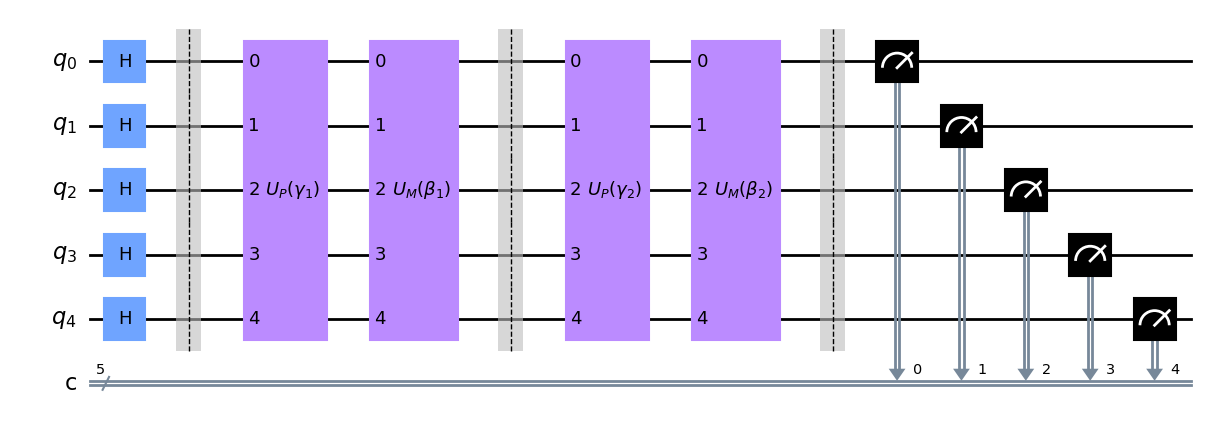

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Gate


Ucost1 = Gate(name='$U_P (\gamma_1)$', num_qubits=5, params=[])
Umixer1 = Gate(name='$U_M (\\beta_1)$', num_qubits=5, params=[])

Ucost2 = Gate(name='$U_P (\gamma_2)$', num_qubits=5, params=[])
Umixer2 = Gate(name='$U_M (\\beta_2)$', num_qubits=5, params=[])



qubits = 5
cbits = 5
qc = QuantumCircuit(qubits, cbits)

qc.h(range(qubits))
qc.barrier()
qc.append(Ucost1, range(qubits))
qc.append(Umixer1, range(qubits))
qc.barrier()
qc.append(Ucost2, range(qubits))
qc.append(Umixer2, range(qubits))
qc.barrier()



qc.measure(range(qubits), range(cbits))
qc.draw(output='mpl')

First, Hadamard gates are applied to prepare an equal superposition state of all qubits in the problem. For a single qubit, this superposition state is typically denoted by $\ket{+}=\frac{1}{\sqrt{2}}\left(\ket{0}+\ket{1}\right)$ and for $N$ qubits we will use the notation $\ket{+}^{\otimes N}$. At the moment, we depict the example with five qubits, but the number is specific to the problem you want to solve.

Second, two parametrized unitary gates, $U_P (\gamma_1)$ and $U_M(\beta_1)$, are applied in succession. These alternating unitary gates are applied $p$-times. In this example, we have depicted $p=2$, but the same could be shown for larger values. $U_P(\gamma)$ is the unitary gate corresponding to our problem Hamiltonian ($H_P$) such that $U_P(\gamma)=e^{-i H_P \gamma }$ and $U_M(\beta)$ is unitary gate corresponding to a Hamiltonian of which the prepared state $\ket{+}^{\otimes N}$ is an eigenstate. Specifically, $H_M = X^{\otimes N}$ and the prepared state $\ket{+}^{\otimes N}$ is its highest energy eigenstate since $H_M \ket{+}^{\otimes N}=1 \ket{+}^{\otimes N}$.

After repeated applications of these two unitary gates, each qubit is measured. Let's think about the way this circuit looks in the context of our previous conversation of adiabatic quantum computing. We start in an eigenstate of $H_M$ and then repeatedly apply the two unitary gates that are the same up to some parameters $\gamma$ and $\beta$. When the circuit is measured, the output is sent to a classical optimizer, which updates better values for $\gamma$ and $\beta$ until the measurement converges. In fact, the typical best soution for the set of parameters $\gamma$ and $\beta$ reflects exactly an adiabatic schedule and QAOA can be seen to be a trotterized version of the adiabatic quantum evolution. By starting in an easy to prepare highest energy eigenstate of the mixer Hamiltonian and repeatedly applying the combination of mixer and problem unitaries, we hope to get closer to the corresponding eigenstate of the problem Hamiltonian. In the limit that $p\rightarrow \infty$ QAOA will exactly replicate the adiabatic quantum evolution.

Of course, we can't actually implement QAOA for infinite depth. QAOA is only well understood for small $p$ and current quantum hardware cannot reliably execute high depth quantum circuits.

<h2 style="color:#9A11DA;">QAOA Implementation </h2>

Let's break down QAOA into the four basic pieces of a VQA that we have learned:

1. Cost function: The cost function is a mathematical representation of the problem to be solved. In QAOA, the cost function is typically expressed as an Ising or Quadratic Unconstrained Binary Optimization (QUBO) model, which is then mapped to a Hamiltonian, a quantum mechanical operator representing the problem's energy landscape.

2. Ansatz: The ansatz is a parameterized quantum circuit that prepares a quantum state as an approximation to the optimal solution. QAOA uses a specific ansatz, which is constructed by alternating two types of operators, namely the problem Hamiltonian (related to the cost function) and a mixing Hamiltonian. The depth of the circuit (number of repetitions of these operators) and the parameters associated with these operators determine the quality of the approximation.

3. Gradients: Gradients represent the change in the cost function with respect to the parameters of the ansatz. In classical optimization, gradients are used to guide the search towards the minimum of the cost function. In QAOA, gradients can be computed using parameter-shift rules, finite-difference methods, or even machine learning techniques. However, gradient-based optimization in QAOA is not always employed, as it can sometimes be computationally expensive or challenging to implement.

4. Optimizers: Optimizers are classical algorithms used to search for the optimal values of the parameters in the ansatz. The goal is to minimize the expectation value of the problem Hamiltonian (cost function) with respect to the prepared quantum state. Commonly used optimizers include gradient-based methods (such as gradient descent or Adam), derivative-free methods (such as Nelder-Mead or particle swarm optimization), or even more advanced techniques like Bayesian optimization.

So far, we understand how to write the QUBO cost function in terms of a Hamiltonian and we have seen the basic schematic of the QAOA quantum circuit. What we haven't discussed is how to actually implement the unitary gate $U_P(\gamma)$ and $U_M(\gamma)$. We will do that now!

Recall that we can get the unitary time-evolution operator corresponding to a given Hamiltonian via the expression $U(t) = e^{-i Ht}$ and the exponential of a matrix is given by $e^M = \sum_{k=0}^{\infty}=\frac{1}{k!}M^k$. We will not go through a full derivation for now, but the result of forming a unitary time-evolution operator for the Pauli matrices is depicted below:

$$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

$$ R_X(2 \theta) = e^{-i \theta X} = \begin{pmatrix} \cos{\theta} & -i \sin{\theta} \\ -i \sin{\theta} & \cos{\theta} \end{pmatrix}, \quad R_Y(2 \theta) = e^{-i \theta Y} = \begin{pmatrix} \cos{\theta} & - \sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{pmatrix}, \quad R_Z(\theta) = e^{-i \theta Z} = \begin{pmatrix} e^{-i \theta} & 0 \\ 0 & e^{i \theta} \end{pmatrix}
$$

Our problem Hamiltonian also includes a term of the form $Z_i Z_j$ which, when exponentiated, is a 4x4 matrix composed of individual $R_Z$'s

$$R_{ZZ}(\theta) = \begin{pmatrix} R_Z(\theta) & 0 \\ 0 & R_Z(-\theta) \end{pmatrix}\;.$$




We can now write out the exact gates necessary to implement both our problem unitary gate and our mixer unitary gate.

Recall the problem Hamiltonian

$$ H_P = \sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j -\frac{Q_{ij}}{2}Z_i\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i\right) \;. $$

We want to write $U_P(\gamma) = e^{-i H_P \gamma}$. Working everything out...

$$ U_P(\gamma) = e^{-i H_P \gamma} = e^{-i  \left(\sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j\right) - \frac{1}{2}\sum_{i}\left( c_i +\sum_j Q_{ij}\right)Z_i\right) \gamma}\\
= \prod_{i , j} R_{Z_i Z_j} \left(\frac{Q_{ij}}{2}\gamma \right) \prod_{i} R_{Z_i}\left(- \left(c_i + \sum_j Q_{ij} \right)  \gamma\right)



With all of this mind, let's write and understand how to fully implement $p=1$ (one application of alternating gates) QAOA for solving Max Cut using Qiskit.

We first initialize the qubits and apply Hadamard gates to produce the full superposition state.

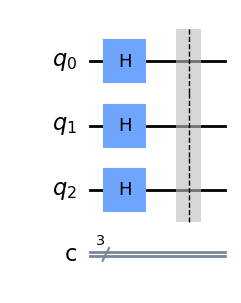

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qubits = 3
cbits = 3
circ = QuantumCircuit(qubits, cbits)

circ.h(range(qubits))
circ.barrier()

circ.draw(output='mpl')

Now, we apply a first layer of our problem unitary gate and our mixer unitary gate. These each decompose as follows...

In [3]:
def filter_pairs(pairs):
    filtered_pairs = []
    for i, pair in enumerate(pairs):
        if (pair[1], pair[0]) not in pairs[i+1:] and pair not in filtered_pairs:
            filtered_pairs.append(pair)
    return filtered_pairs




def U_P(circ, gamma, Q, c):
    dim = Q.shape[0]
    pairs = []
    for i in range(dim):
        for j in range(dim):
            if i!=j:
                pairs.append((i, j))

    pairs = filter_pairs(pairs)

    Qsum = np.sum(Q,axis=1)
    for i,j in pairs:
        circ.rzz((Q[i][j]/2*gamma), i, j)
    for i in range(dim):
        circ.rz(-(c[i] + Qsum[i]),i)
    circ.barrier()
    return circ

def U_M(circ, beta):
    for i in range(circ.num_qubits):
        circ.rx(2*beta, i-1)
    circ.barrier()
    return circ

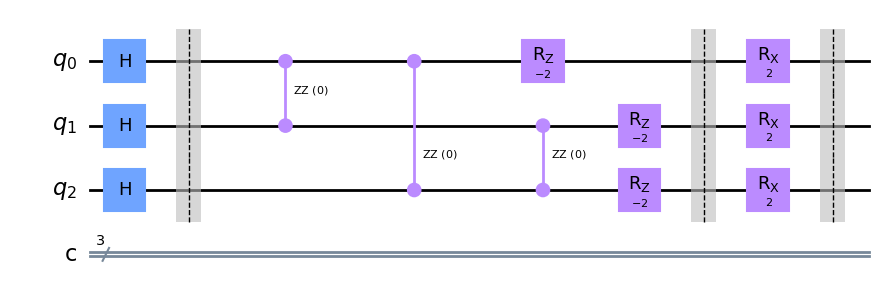

In [4]:
import numpy as np

# circ = QuantumCircuit(4,4)
gamma = 1
beta = 1

c = np.ones(3)
Q = np.identity(3)

# c = np.array([1,1,1,1])
# Q = np.array([[0., 1., 1., 1.],
#             [1., 0., 1., 0.],
#             [1., 1., 0., 1.],
#             [1., 0., 1., 0.]])


circ = U_P(circ, gamma, Q, c)
circ = U_M(circ, beta)
circ.draw(output='mpl')

We would then just need to add a measurement at the end

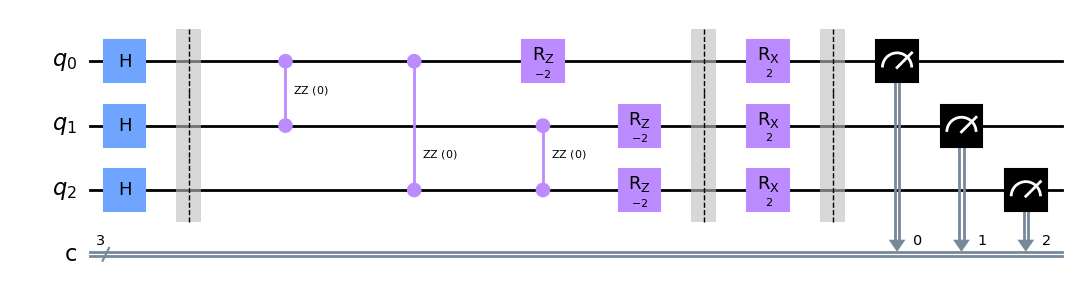

In [5]:
circ.measure(range(circ.num_qubits), range(circ.num_qubits))
circ.draw(output='mpl')

We want the encoding of $Q_{ij}$ and $c_i$ to the basic max cut problem we detail in the previous notebook. Generate a random graph and then map the graph into the corresponding $Q_{ij}$ matrix.

In [49]:
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

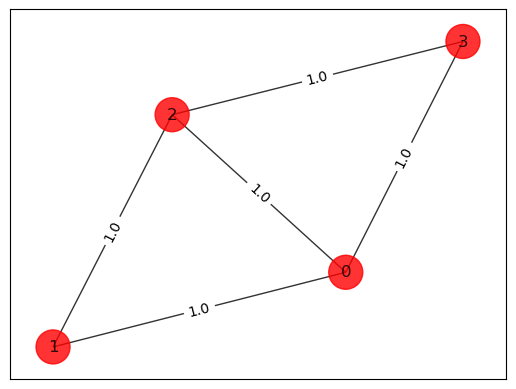

In [50]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [51]:
# Computing the weight matrix from the random graph
Q = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            Q[i, j] = temp["weight"]

print(Q)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


case = [0, 0, 0, 0] cut = 0.0
case = [1, 0, 0, 0] cut = 3.0
case = [0, 1, 0, 0] cut = 2.0
case = [1, 1, 0, 0] cut = 3.0
case = [0, 0, 1, 0] cut = 3.0
case = [1, 0, 1, 0] cut = 4.0
case = [0, 1, 1, 0] cut = 3.0
case = [1, 1, 1, 0] cut = 2.0
case = [0, 0, 0, 1] cut = 2.0
case = [1, 0, 0, 1] cut = 3.0
case = [0, 1, 0, 1] cut = 4.0
case = [1, 1, 0, 1] cut = 3.0
case = [0, 0, 1, 1] cut = 3.0
case = [1, 0, 1, 1] cut = 2.0
case = [0, 1, 1, 1] cut = 3.0
case = [1, 1, 1, 1] cut = 0.0

Best solution = [1, 0, 1, 0] cut = 4.0


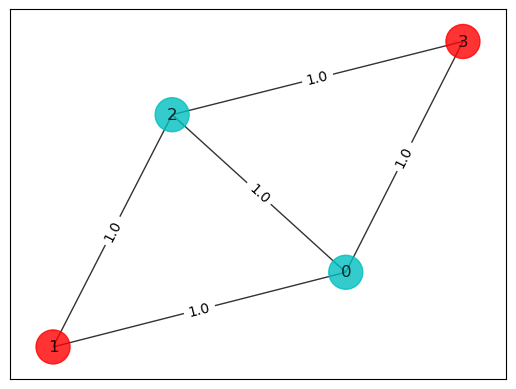

In [52]:
# Brute force solution so we can have something to check against

best_cut_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cut = 0
    for i in range(n):
        for j in range(n):
            cut += Q[i, j] * x[i] * (1 - x[j])
    if best_cut_brute < cut:
        best_cut_brute = cut
        xbest_brute = x
    print("case = " + str(x) + " cut = " + str(cut))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cut = " + str(best_cut_brute))

Notice that the maximal cut is degenerate between [0,1,0,1] and [1,0,1,0]. Also, we should note that the values here differ from the cut value since we left off a constant when writing the QUBO problem hamiltonian earlier. (* calculate this constant show that it is equal to 2.5 and thus gives the correct max cut value. *)

Now we want to use this as input to the parametrized quantum circuit we wrote down. We can also calculate the initial cost by simulating the circuit for some amount of shots. First, let's just write down the QAOA circuit

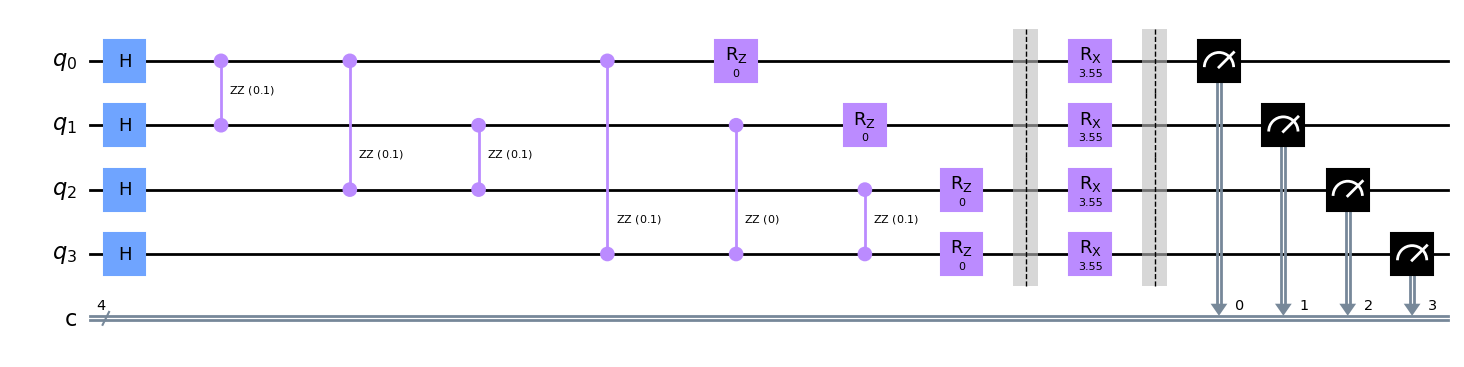

In [53]:
# Write QAOA circuit

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import random

qubits = n
cbits = n
circ = QuantumCircuit(qubits, cbits)

circ.h(range(qubits))

gamma = random.uniform(0.0, 2*np.pi)
beta = random.uniform(0.0, 2*np.pi)

Qsum = np.sum(Q,axis=1)
c = -Qsum


circ = U_P(circ, gamma, Q, c)
circ = U_M(circ, beta)
circ.measure(range(circ.num_qubits), range(circ.num_qubits))

circ.draw(output='mpl')

In [54]:
from qiskit import Aer, execute # Import Aer and execute
backend_sim = Aer.get_backend('aer_simulator') #create backend object
sim = execute(circ, backend_sim, shots=10000) #run the simulation
sim_result = sim.result() #get result object
counts = sim_result.get_counts(circ) #obtain the counts from the result object
print(counts)

{'1100': 589, '0111': 684, '0011': 549, '1011': 620, '1010': 495, '1101': 674, '0100': 559, '0000': 861, '0010': 657, '1110': 586, '1111': 830, '0001': 564, '0110': 580, '1000': 662, '0101': 507, '1001': 583}


We want to be able to measure the energy corresponding to a configuration using the problem Hamiltonian which we repeat below

<!-- $$ H_P = \sum_{i<j}\left( \frac{Q_{ij}}{2} Z_i Z_j -Q_{ij}Z_i\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i\right) \;. $$ -->
$$ H_P = \sum_{i,j}\left( \frac{Q_{ij}}{4} Z_i Z_j -\frac{Q_{ij}}{2}Z_i\right) + \sum_{i}\left( -\frac{c_i}{2}Z_i\right) \;. $$


In [55]:
def compute_z_state(state):
    return [1 if qubit == '0' else -1 for qubit in state]

state = '0000'

z_state = np.array(compute_z_state(state))
# print(z_state)

def compute_maxcut_energy(z_state, Q, c):
    return np.matmul(np.matmul(Q,z_state), z_state)/4


In [56]:
states = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                states.append(str(i) + str(j) + str(k) + str(l))

In [57]:
Qsum = np.sum(Q,axis=1)
c = -Qsum

for state in states:
    z_state = np.array(compute_z_state(state))
    energy = compute_maxcut_energy(z_state, Q, c)
    print("energy of state " + str(state) + " = " + str(energy))


energy of state 0000 = 2.5
energy of state 0001 = 0.5
energy of state 0010 = -0.5
energy of state 0011 = -0.5
energy of state 0100 = 0.5
energy of state 0101 = -1.5
energy of state 0110 = -0.5
energy of state 0111 = -0.5
energy of state 1000 = -0.5
energy of state 1001 = -0.5
energy of state 1010 = -1.5
energy of state 1011 = 0.5
energy of state 1100 = -0.5
energy of state 1101 = -0.5
energy of state 1110 = 0.5
energy of state 1111 = 2.5


Perfect! We see that the states corresponding to degenerate solutions of Max Cut are the lowest energy states. Now, we want to reach these states by optimization because it won't always be this simple to just enumerate all the energies through exhaustive search.

In [58]:
def calc_avg_energy(counts, Q, c):
    energy_array = []
    for elem in counts.items():
        state = elem[0]
        z_state = compute_z_state(state)
        energy = compute_maxcut_energy(z_state, Q, c)
        energy_array.append(energy*elem[1]/sum(counts.values()))

    avg_energy = np.array(energy_array).mean()
    return avg_energy


In [59]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import random

qubits = n
cbits = n
circ = QuantumCircuit(qubits, cbits)

circ.h(range(qubits))

seed_value = 40

c = np.array([0,0,0,0])

circ = U_P(circ, gamma, Q, c)
circ = U_M(circ, beta)
circ.measure(range(circ.num_qubits), range(circ.num_qubits))

circ.draw(output='mpl')


from qiskit import Aer, execute # Import Aer and execute
backend_sim = Aer.get_backend('qasm_simulator') #create backend object
sim = execute(circ, backend_sim, shots=1000) #run the simulation
sim_result = sim.result() #get result object
counts = sim_result.get_counts(circ) #obtain the counts from the result object
energy = calc_avg_energy(counts, Q, np.zeros(n))
print(energy)
print(counts)

-0.0010625000000000027
{'1111': 15, '1110': 25, '1010': 33, '0000': 94, '0010': 64, '0100': 137, '1100': 48, '1101': 37, '1000': 53, '0110': 65, '0111': 45, '0011': 55, '1011': 24, '0001': 125, '1001': 58, '0101': 122}


Great! We can now initialize the parametrized circuit using a random seed, measure it many times, and print the energy. We want to minimize the energy by varying the parameters. Doing so will solve the original QUBO problem and therefore Max Cut.

In [60]:
# Q and c defined outside the parametrized circuit
Qsum = np.sum(Q,axis=1)
c = -Qsum
def qaoa_circ(x):
    gamma, beta = x[0], x[1]

    qubits = n
    cbits = n
    
    circ = QuantumCircuit(qubits, cbits)
    circ.h(range(qubits))
    circ = U_P(circ, gamma, Q, c)
    circ = U_M(circ, beta)
    circ.measure(range(circ.num_qubits), range(circ.num_qubits))

    backend_sim = Aer.get_backend('qasm_simulator') #create backend object
    sim = execute(circ, backend_sim, shots=1000) #run the simulation
    sim_result = sim.result() #get result object
    counts = sim_result.get_counts(circ) #obtain the counts from the result object
    return counts

def loss(x):
    counts = qaoa_circ(x)
    energy = calc_avg_energy(counts, Q,c)
    return energy

In [61]:
from qiskit.algorithms.optimizers import SPSA, NELDER_MEAD, COBYLA

seed_value = 40

random.seed(seed_value)
gamma0 = random.uniform(0.0, 2*np.pi)
beta0 = random.uniform(0.0, 2*np.pi)
x0 = [gamma0, beta0]

print("initial energy is: " + str(loss(x0)))
spsa = SPSA(maxiter=500)
result_spsa = spsa.minimize(loss, x0=[gamma0, beta0])
print('The minimum value is: ', result_spsa.fun)
print('The value of x for the minimum value is: ',result_spsa.x)

initial energy is: 0.0165625
The minimum value is:  -0.0411875
The value of x for the minimum value is:  [4.16662167 6.90578008]


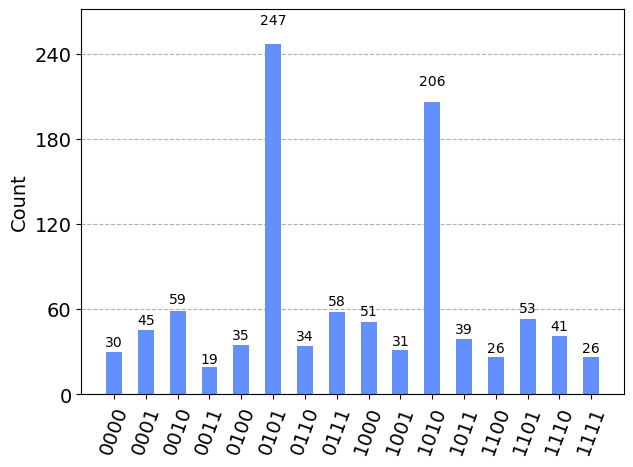

In [62]:
from qiskit.visualization import plot_histogram

counts = qaoa_circ(result_spsa.x)
plot_histogram(counts)

In [68]:
counts.items()

dict_items([('1100', 26), ('0001', 45), ('1010', 206), ('0111', 58), ('0011', 19), ('1011', 39), ('1110', 41), ('0010', 59), ('0000', 30), ('1111', 26), ('0100', 35), ('0101', 247), ('1001', 31), ('1101', 53), ('1000', 51), ('0110', 34)])

Let's do this for another graph to convince ourselves it works.

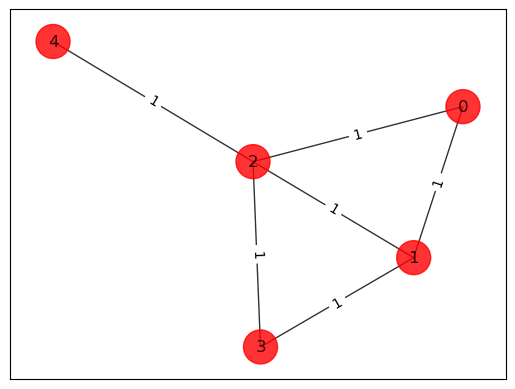

In [38]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

n = 5  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))

# Add random edges with random weights
for i in range(n):
    for j in range(i+1, n):
        if random.random() < 0.5: # 50% chance of adding an edge
            # weight = round(random.uniform(0.5, 1.5), 2) # random weight between 0.5 and 1.5
            weight = 1
            G.add_edge(i, j, weight=weight)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)

draw_graph(G, colors, pos)

In [39]:
# Computing the weight matrix from the random graph
Q = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            Q[i, j] = temp["weight"]

print(Q)

[[0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [40]:
from qiskit.algorithms.optimizers import SPSA, NELDER_MEAD, COBYLA

seed_value = 40

random.seed(seed_value)
gamma0 = random.uniform(0.0, 2*np.pi)
beta0 = random.uniform(0.0, 2*np.pi)
x0 = [gamma0, beta0]

print("initial energy is: " + str(loss(x0)))
spsa = SPSA(maxiter=50)
result_spsa = spsa.minimize(loss, x0=[gamma0, beta0])
print('The minimum value is: ', result_spsa.fun)
print('The value of x for the minimum value is: ',result_spsa.x)

initial energy is: -0.00121875
The minimum value is:  -0.0095
The value of x for the minimum value is:  [2.56520652 5.11608163]


case = [0, 0, 0, 0, 0] cut = 0.0
case = [1, 0, 0, 0, 0] cut = 2.0
case = [0, 1, 0, 0, 0] cut = 3.0
case = [1, 1, 0, 0, 0] cut = 3.0
case = [0, 0, 1, 0, 0] cut = 4.0
case = [1, 0, 1, 0, 0] cut = 4.0
case = [0, 1, 1, 0, 0] cut = 5.0
case = [1, 1, 1, 0, 0] cut = 3.0
case = [0, 0, 0, 1, 0] cut = 2.0
case = [1, 0, 0, 1, 0] cut = 4.0
case = [0, 1, 0, 1, 0] cut = 3.0
case = [1, 1, 0, 1, 0] cut = 3.0
case = [0, 0, 1, 1, 0] cut = 4.0
case = [1, 0, 1, 1, 0] cut = 4.0
case = [0, 1, 1, 1, 0] cut = 3.0
case = [1, 1, 1, 1, 0] cut = 1.0
case = [0, 0, 0, 0, 1] cut = 1.0
case = [1, 0, 0, 0, 1] cut = 3.0
case = [0, 1, 0, 0, 1] cut = 4.0
case = [1, 1, 0, 0, 1] cut = 4.0
case = [0, 0, 1, 0, 1] cut = 3.0
case = [1, 0, 1, 0, 1] cut = 3.0
case = [0, 1, 1, 0, 1] cut = 4.0
case = [1, 1, 1, 0, 1] cut = 2.0
case = [0, 0, 0, 1, 1] cut = 3.0
case = [1, 0, 0, 1, 1] cut = 5.0
case = [0, 1, 0, 1, 1] cut = 4.0
case = [1, 1, 0, 1, 1] cut = 4.0
case = [0, 0, 1, 1, 1] cut = 3.0
case = [1, 0, 1, 1, 1] cut = 3.0
case = [0,

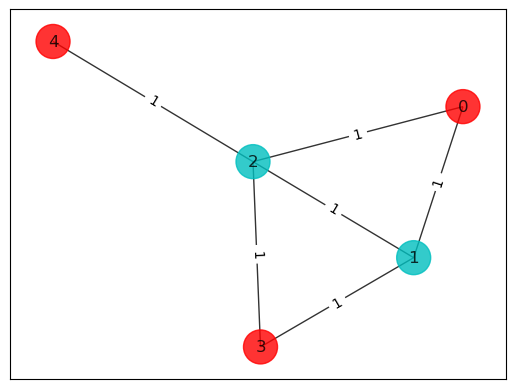

In [41]:
# Brute force solution so we can have something to check against

best_cut_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cut = 0
    for i in range(n):
        for j in range(n):
            cut += Q[i, j] * x[i] * (1 - x[j])
    if best_cut_brute < cut:
        best_cut_brute = cut
        xbest_brute = x
    print("case = " + str(x) + " cut = " + str(cut))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cut = " + str(best_cut_brute))

Now that we have seen how to build QAOA from scratch, we can show how to do it using the pre-built Qiskit library.

In [100]:
from qiskit import Aer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import Maxcut

# Define the graph
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
num_nodes = 4

# Create an instance of Maxcut
problem = Maxcut(edges)

# Create a QuadraticProgram based on problem
qp = problem.to_quadratic_program()

# Display the problem
print(qp.export_as_lp_string())

ModuleNotFoundError: No module named 'qiskit_optimization'

In [ ]:
ansatz = PauliTwoDesign(2, reps=1, seed=1) # defining a quantum circuit for parameterized ansatz (* Exercise: Look up the documentation for PauliTwoDesign. Show that `\sqrt{H} = RY(\pi/4)` *)
observable = Z ^ Z # defining the Hamiltonian
# Random seed which defines "rotations" in the quantum circuit
initial_point = np.random.random(ansatz.num_parameters) 


from qiskit.algorithms.optimizers import SPSA, NELDER_MEAD, COBYLA

# Running the optimization using SPSA, COBYLA and Nelder-Mead
spsa = SPSA(maxiter=500)
cobyla = COBYLA(maxiter=300)
nm = NELDER_MEAD(maxiter=300)

result_spsa = spsa.minimize(loss, x0=initial_point)
result_nm = nm.minimize(loss, x0=initial_point)
result_cobyla = cobyla.minimize(loss, x0=initial_point)

We can now execute this quantum circuit 

In [ ]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

In [ ]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result.prettyprint())


In [ ]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

